<h1 style="text-align: center;">This is a Jupyter Notebook</h1>

<img src="jupyter_logo.png" alt="Jupyter_Logo" style="width: 150px;"/> </td>

It provides a nice environment for interacting with **JU**lia, **PY**thon, and **R**. We'll focus here on R.

* Whereas RMarkdown provides a handy way of integrating R, LaTeX, and written text, Jupyter notebooks provide a much more dynamic way of doing this.
* These are not as good for generating reports or assignment solutions, but they are much more useful for interactive programming in a classroom environment.
* The cells below illustrate some of the capability of the Jupyter environment.

The Jupyter notebook (along with many other useful data science tools) is accessible within the [Anaconda](https://www.anaconda.com/) platform.

<img src="Anaconda_Logo.png" alt="Anaconda_Logo" style="width: 250px;"/> </td>

However, the version of the notebook we're interacting with is made with [Binder](https://mybinder.org/). It has the benefit (to the student) of being editable in real-time and available online without needing to download anything.
<img src="binder_logo.svg" alt="Binder_Logo" style="width: 250px;"/> </td>

## Example Exercise in R

In this exercise we will explore the `AirPassengers` times series data. Let us first plot the raw data.

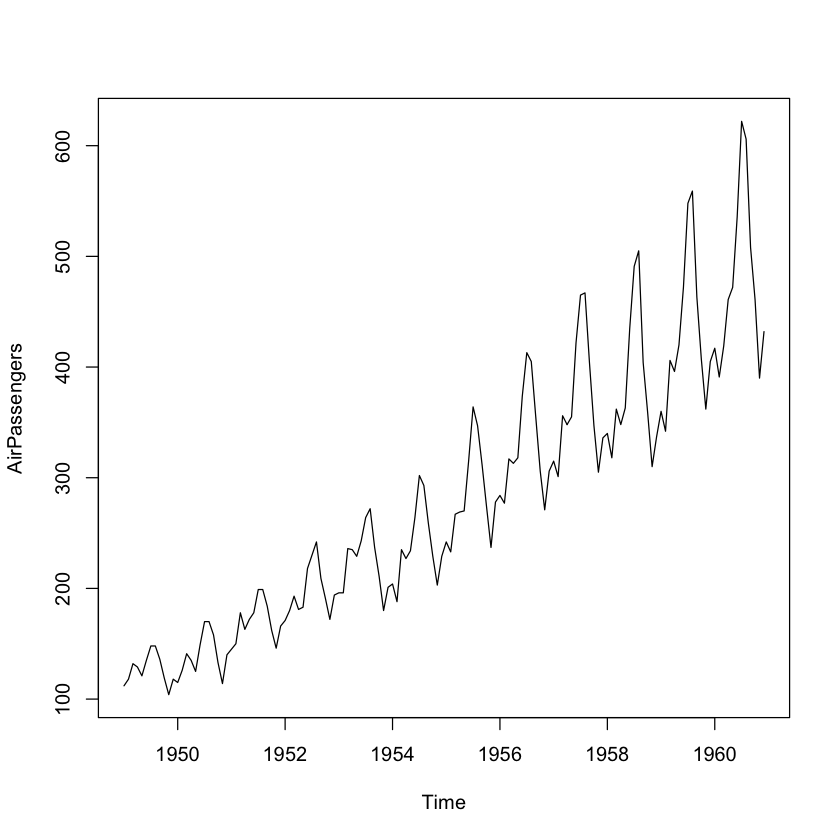

In [32]:
plot(AirPassengers)

Variability appears to increase with time. Let's consider a log-transformed version of the data.

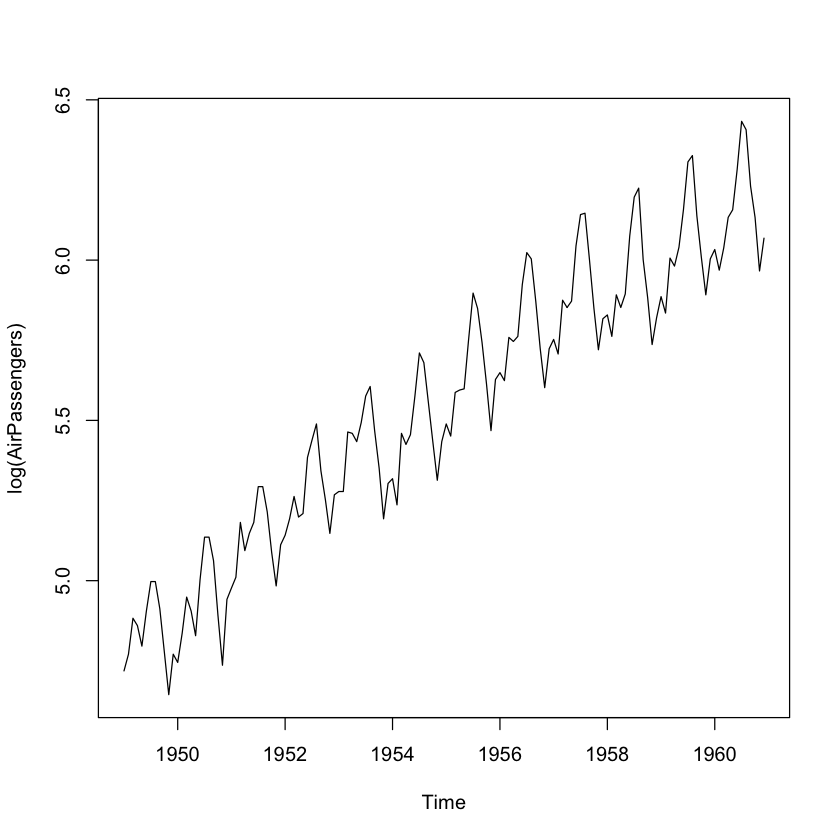

In [12]:
plot(log(AirPassengers))

Variation appears to be stabilizied. This time series is clearly non-stationary; there are obvious trend and seasonal components. Let's use the `decompose` function to visualize how much of the reponse variation is explained by trend and seasonality.

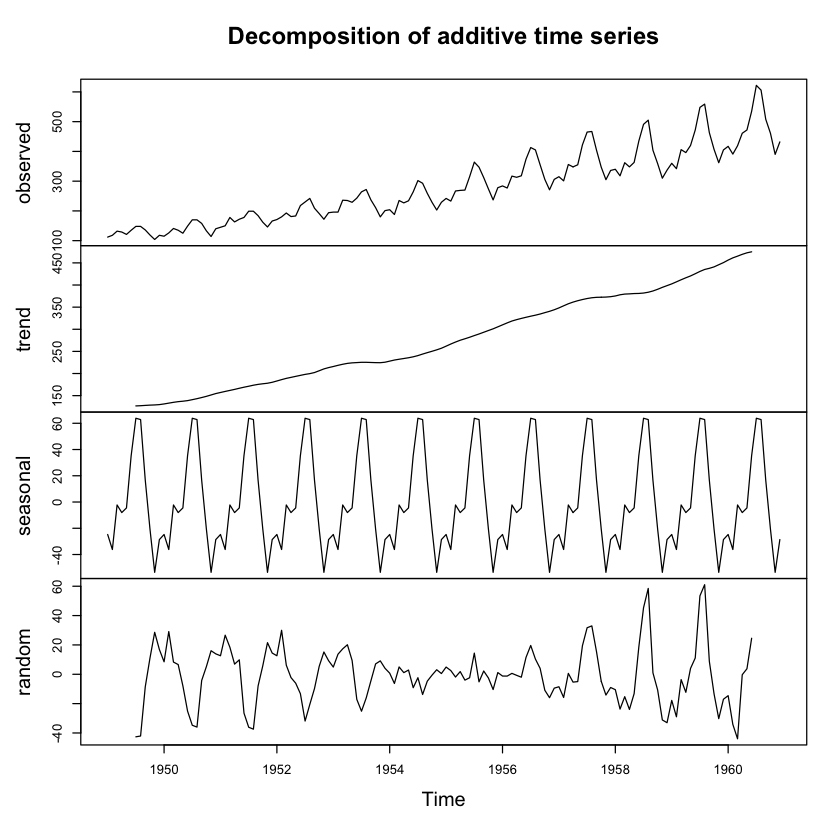

In [14]:
plot(decompose(AirPassengers))

The plot above indicates a roughly linear trend (where the response increases with time), and monthly seasonality. Let's try modeling this using a linear regression. We begin by defining trend and season components. 

In [17]:
t <- time(AirPassengers) # Extracting time as a covariate
month <- as.factor(cycle(AirPassengers)) # Defining month as a seasonal covariate

First we'll consider a model simply with the linear effect of time: $$y_t = \beta_0 + \beta_1t + \varepsilon_t$$


Call:
lm(formula = log(AirPassengers) ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30858 -0.10388 -0.01796  0.09738  0.29538 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.302e+02  6.539e+00  -35.20   <2e-16 ***
t            1.206e-01  3.345e-03   36.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.139 on 142 degrees of freedom
Multiple R-squared:  0.9015,	Adjusted R-squared:  0.9008 
F-statistic:  1300 on 1 and 142 DF,  p-value: < 2.2e-16


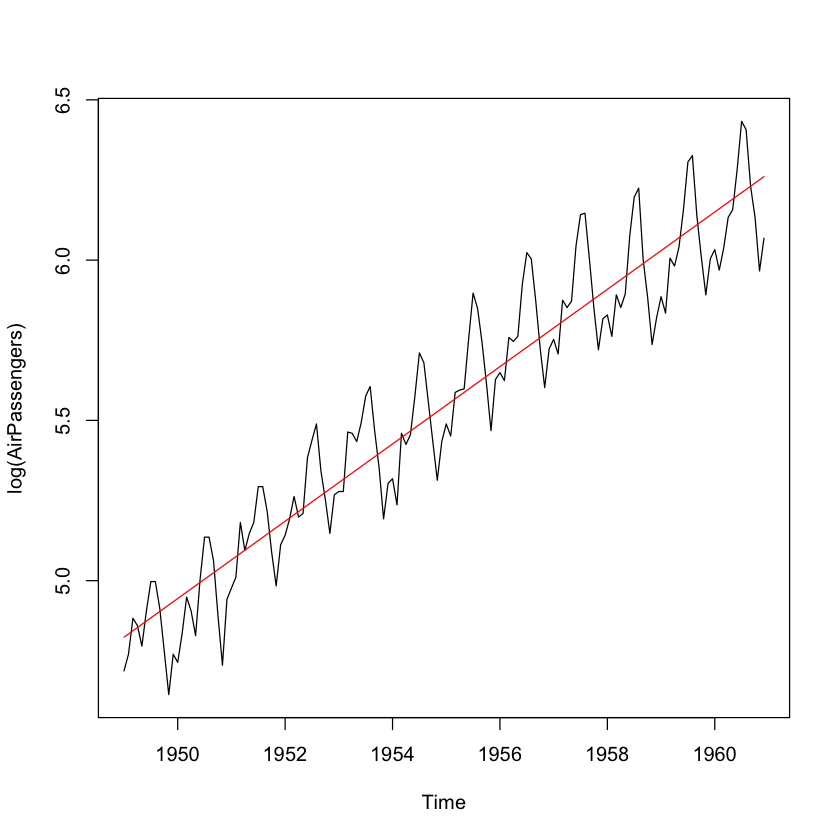

In [15]:
reg0 <- lm(log(AirPassengers) ~ t)
summary(reg0)
plot(log(AirPassengers))
points(t,predict.lm(reg0), type = 'l', col = 'red')

This appears to capture the trend, but not the seasonaility. Let's next fit a model with just the seasonal component for comparison: $$y_t = \beta_0 + \beta_2\mathbb{I}\{t \equiv 2\text{ (mod }12)\}+ \beta_3\mathbb{I}\{t \equiv 3\text{ (mod }12)\} + \cdots + \beta_{12}\mathbb{I}\{t \equiv 0\text{ (mod }12)\}+\varepsilon_t$$


Call:
lm(formula = log(AirPassengers) ~ month)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76598 -0.33024  0.00432  0.37042  0.67052 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.40139    0.12691  42.561   <2e-16 ***
month2      -0.01199    0.17948  -0.067   0.9469    
month3       0.12831    0.17948   0.715   0.4759    
month4       0.10711    0.17948   0.597   0.5517    
month5       0.11481    0.17948   0.640   0.5235    
month6       0.24702    0.17948   1.376   0.1711    
month7       0.36103    0.17948   2.012   0.0463 *  
month8       0.36181    0.17948   2.016   0.0458 *  
month9       0.22724    0.17948   1.266   0.2077    
month10      0.09915    0.17948   0.552   0.5816    
month11     -0.03450    0.17948  -0.192   0.8479    
month12      0.08944    0.17948   0.498   0.6191    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4396 on 132 degrees of freedom
Multiple R-squared

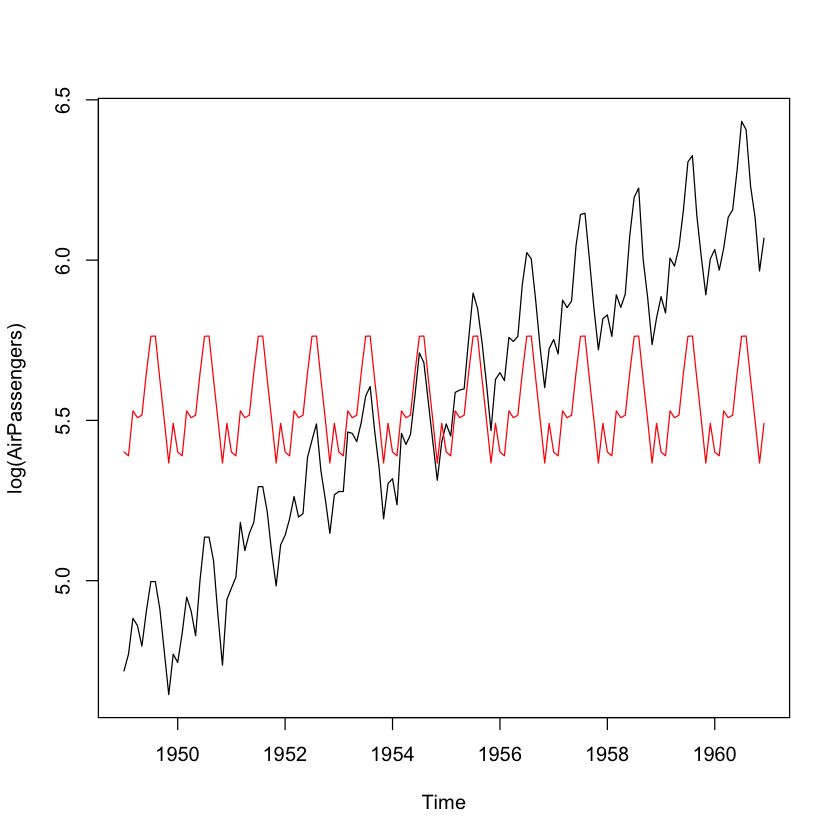

In [19]:
reg1 <- lm(log(AirPassengers) ~ month) 
summary(reg1)
plot(log(AirPassengers))
points(t, predict.lm(reg1), type = 'l', col = 'red') 

This appears to capture the seasonal effect, but not the trend. Let's finally fit a model with both the trend and the seasonal components: $$y_t = \beta_0 + \beta_1t+\beta_2\mathbb{I}\{t \equiv 2\text{ (mod }12)\}+ \beta_3\mathbb{I}\{t \equiv 3\text{ (mod }12)\} + \cdots + \beta_{12}\mathbb{I}\{t \equiv 0\text{ (mod }12)\}+\varepsilon_t$$


Call:
lm(formula = log(AirPassengers) ~ t + month)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.156370 -0.041016  0.003677  0.044069  0.132324 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.308e+02  2.798e+00 -82.467  < 2e-16 ***
t            1.208e-01  1.432e-03  84.399  < 2e-16 ***
month2      -2.206e-02  2.421e-02  -0.911  0.36400    
month3       1.082e-01  2.421e-02   4.468 1.69e-05 ***
month4       7.690e-02  2.421e-02   3.176  0.00186 ** 
month5       7.453e-02  2.422e-02   3.078  0.00254 ** 
month6       1.967e-01  2.422e-02   8.121 2.98e-13 ***
month7       3.006e-01  2.422e-02  12.411  < 2e-16 ***
month8       2.913e-01  2.423e-02  12.026  < 2e-16 ***
month9       1.467e-01  2.423e-02   6.054 1.39e-08 ***
month10      8.532e-03  2.423e-02   0.352  0.72537    
month11     -1.352e-01  2.424e-02  -5.577 1.34e-07 ***
month12     -2.132e-02  2.425e-02  -0.879  0.38082    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0

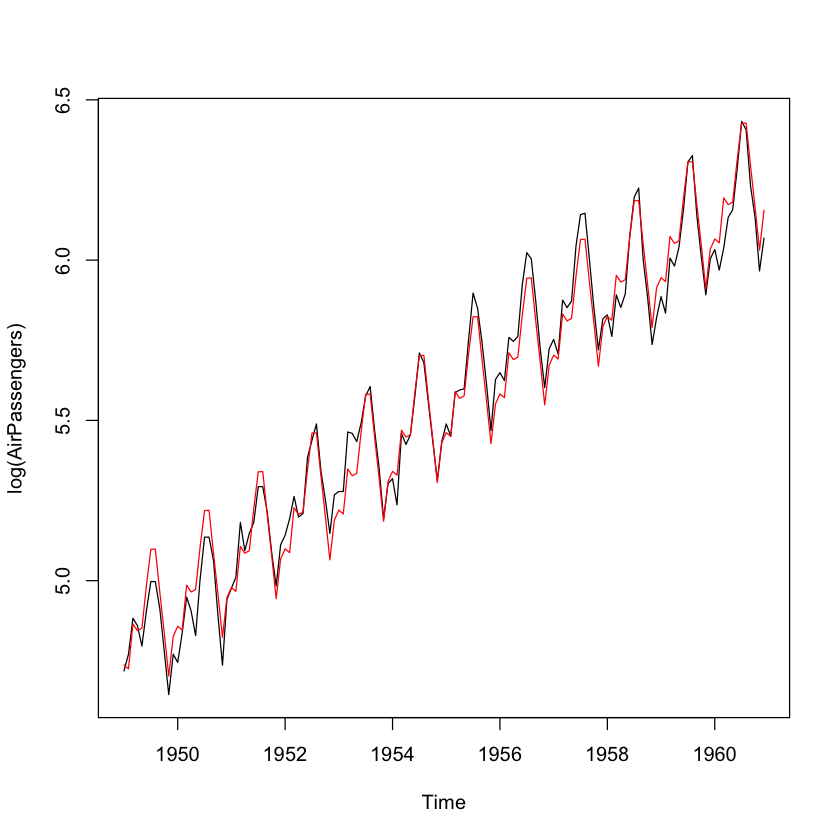

In [18]:
reg2 <- lm(log(AirPassengers) ~ t + month) 
summary(reg2)
plot(log(AirPassengers))
points(t,predict.lm(reg2), type = 'l', col = 'red') 

This looks much better, but it's on the log-scale, let's visualize the data, the fitted model, and two years of forecasts in the natural units.

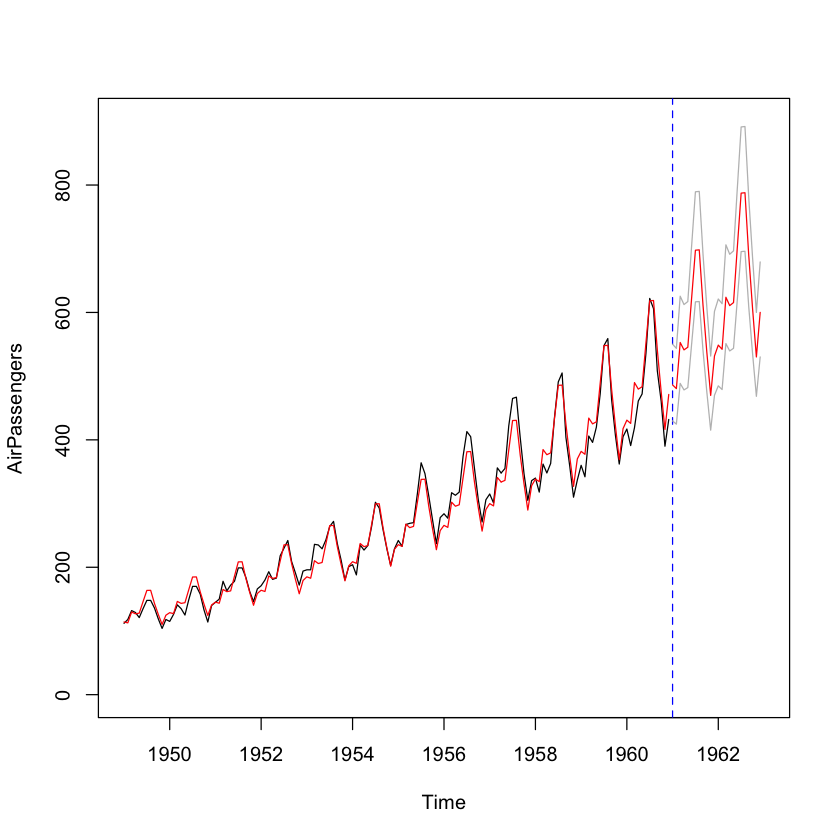

In [27]:
plot(AirPassengers,xlim=c(1949,1963),ylim=c(0,900)) #plotting the data
points(t, exp(predict.lm(reg2)), type = 'l', col = 'red')
abline(v = 1961, col = 'blue', lty = 2) 

t.new <- seq(1961,1963, length = 25)[1:24] 
month.new <- factor(rep(1:12,2)) 
new <- data.frame(t = t.new, month = month.new)
pred <- predict.lm(reg2, new, interval = 'prediction')

lines(exp(pred[,1]) ~ t.new, type = 'l', col = 'red')
lines(exp(pred[,2]) ~ t.new, col = 'grey') 
lines(exp(pred[,3]) ~ t.new, col = 'grey') 

This appears to work well. But the model itself is a linear regression. For valid statistical inference, we should check to ensure the assumptions underlying the model are satisfied.

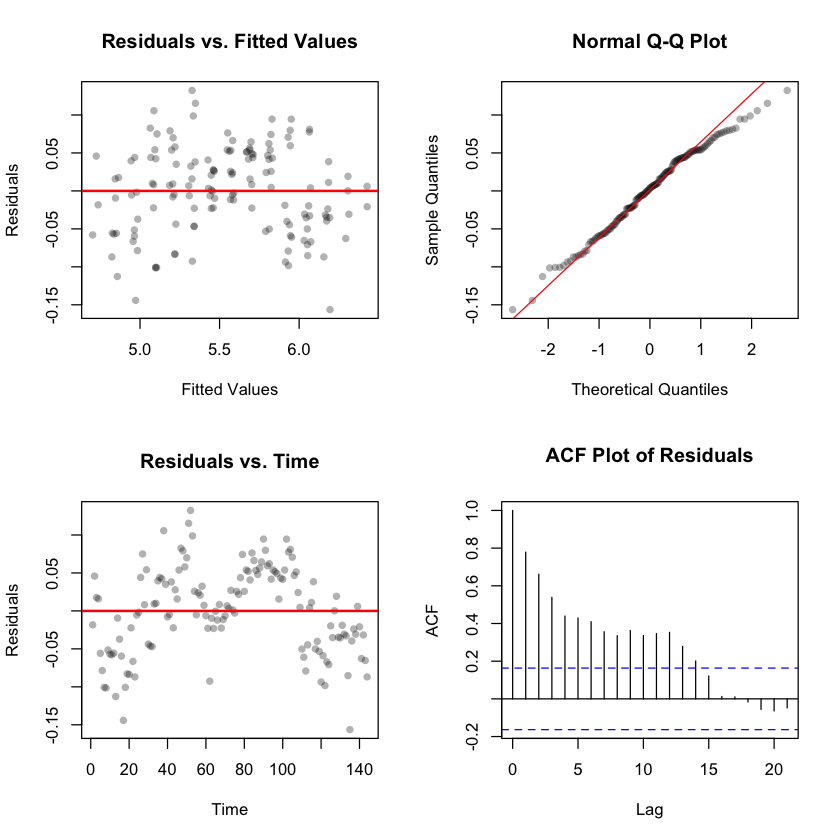

In [31]:
par(mfrow = c(2,2))
plot(reg2$fitted, reg2$residuals, main = "Residuals vs. Fitted Values", ylab = "Residuals", xlab = "Fitted Values",
    pch = 16, col = adjustcolor("black", 0.3)) 
abline(h = 0, col = "red", lwd = 2)
qqnorm(reg2$residuals, pch = 16, col = adjustcolor("black", 0.3))
qqline(reg2$residuals, col = "red") 
plot(reg2$residuals, main = "Residuals vs. Time", ylab = "Residuals", xlab = "Time", 
     pch = 16, col = adjustcolor("black", 0.3)) 
abline(h = 0, col = "red", lwd = 2) 
acf(reg2$residuals, main = "ACF Plot of Residuals")

As we can see, there is still considerable variation in the residuals. While the model appeared to fit the data well, we can see that our linear predictor did not adequately capture all of the autocorrelation in the data. This motivates the need for more sophisticated time series models that are designed to better handle temporal correlation.